# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
p1_gen = pd.read_csv("Plant_1_Generation_Data.csv")
p1_weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

p2_gen = pd.read_csv("Plant_2_Generation_Data.csv")
p2_weather = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

## Combining Generation and Weather Data
**Based on date_time and plant_id**

In [3]:
for df in [p1_gen, p1_weather, p2_gen, p2_weather]:
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)

p1 = pd.merge(p1_gen, p1_weather, on=['DATE_TIME','PLANT_ID'], how='left')
p2 = pd.merge(p2_gen, p2_weather, on=['DATE_TIME','PLANT_ID'], how='left')

print(p1.shape, p2.shape)


(68778, 11) (67698, 11)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9676\3279151252.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9676\3279151252.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9676\3279151252.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)


In [4]:
p1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [5]:
p2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [6]:
print(p1.isnull().sum())

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           4
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64


In [7]:
p1.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68778,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:49.458256896,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06,25.558521,31.244997,0.232305
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,2020-05-24 00:45:00,4135001.0,0.000000,0.000000,0.000000,6.512003e+06,22.724491,21.123944,0.000000
50%,2020-06-01 14:30:00,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06,24.670178,24.818984,0.031620
75%,2020-06-09 20:00:00,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06,27.960429,41.693659,0.454880
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652
std,NaN,0.0,4036.457169,394.396439,3145.178309,4.162720e+05,3.361300,12.308283,0.301948


In [8]:
p2.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204
min,2020-05-15 00:00:00,4136001.0,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,2020-05-23 21:00:00,4136001.0,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000
50%,2020-06-01 23:00:00,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554
75%,2020-06-09 23:30:00,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027
max,2020-06-17 23:45:00,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766
std,NaN,0.0,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365


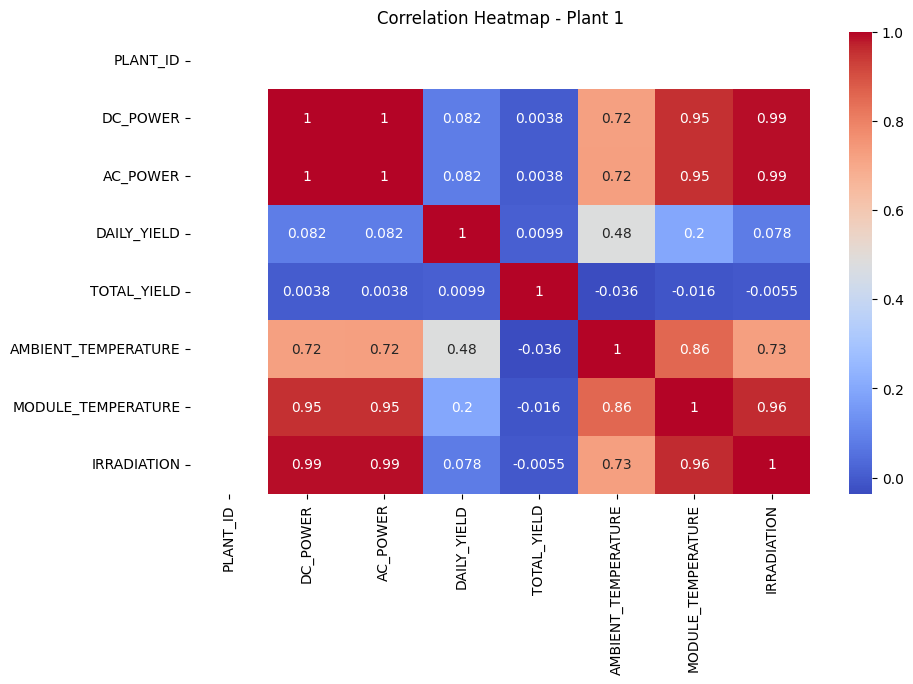

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(p1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Plant 1")
plt.show()

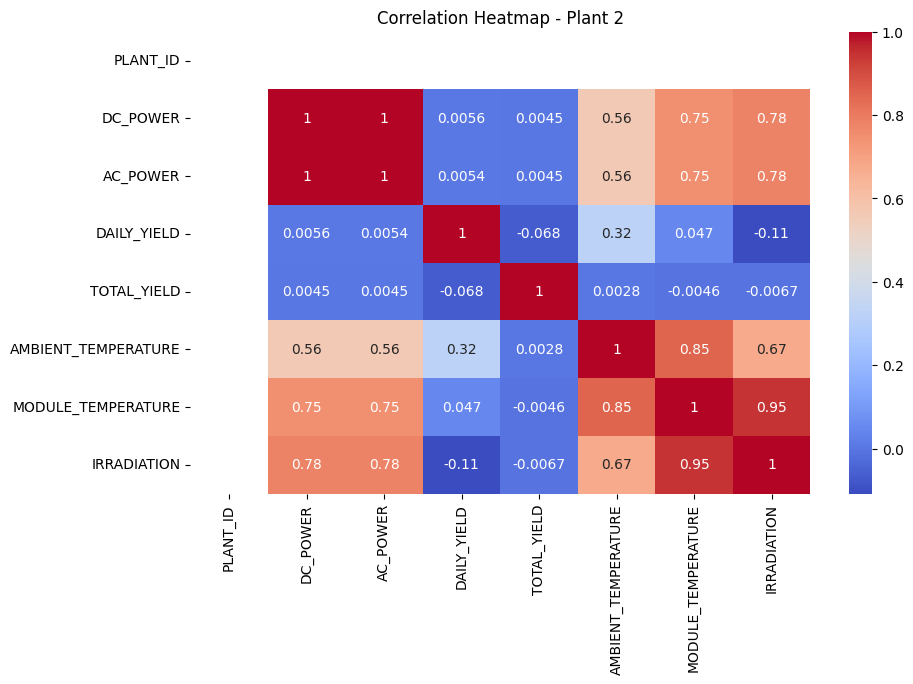

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(p2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Plant 2")
plt.show()

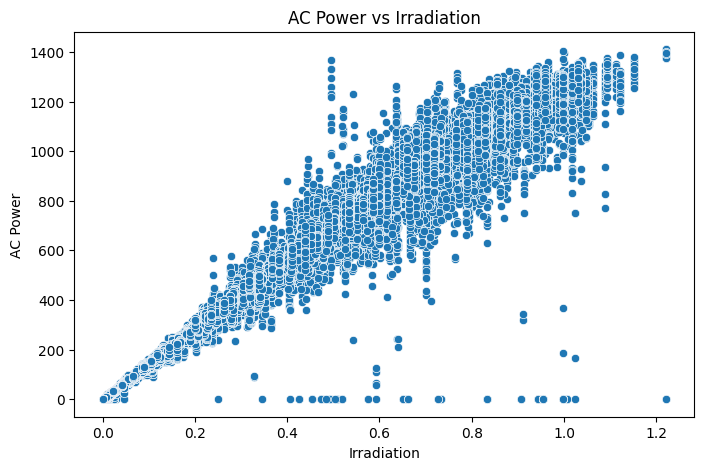

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=p1['IRRADIATION'], y=p1['AC_POWER'])
plt.title("AC Power vs Irradiation")
plt.xlabel("Irradiation")
plt.ylabel("AC Power")
plt.show()

# Combine p1 and p2

In [12]:
p1['PLANT'] = 1
p2['PLANT'] = 2
df = pd.concat([p1, p2], ignore_index=True)

In [13]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

In [14]:
df = df.rename(columns={'SOURCE_KEY_x':'INVERTER_ID'})
df = df.drop(columns=['SOURCE_KEY_y'], errors='ignore')

In [15]:
print(df[['INVERTER_ID']].head())

       INVERTER_ID
0  1BY6WEcLGh8j5v7
1  1IF53ai7Xc0U56Y
2  3PZuoBAID5Wc2HD
3  7JYdWkrLSPkdwr4
4  McdE0feGgRqW7Ca


In [16]:
df['HOUR'] = df['DATE_TIME'].dt.hour
df['DAY_OF_YEAR'] = df['DATE_TIME'].dt.dayofyear

df['HOUR_SIN'] = np.sin(2*np.pi*df['HOUR']/24)
df['HOUR_COS'] = np.cos(2*np.pi*df['HOUR']/24)
df['DAY_SIN'] = np.sin(2*np.pi*df['DAY_OF_YEAR']/365)
df['DAY_COS'] = np.cos(2*np.pi*df['DAY_OF_YEAR']/365)

In [17]:
df = df[df['IRRADIATION'] > 0.2]
df = df[df['AC_POWER'] > 0]

In [18]:
df['TEMP_DIFF'] = df['MODULE_TEMPERATURE'] - 25
df['TEMP_EFFICIENCY'] = 1 - (0.004 * df['TEMP_DIFF'])

df['IRRADIATION_SQ'] = df['IRRADIATION']**2
df['TEMP_IRRADIATION_INTERACTION'] = df['IRRADIATION'] * df['MODULE_TEMPERATURE']

In [19]:
df = df.sort_values(['PLANT','INVERTER_ID','DATE_TIME'])

df['PREV_POWER'] = df.groupby(['PLANT','INVERTER_ID'])['AC_POWER'].shift(1)
df['PREV_IRRADIATION'] = df.groupby(['PLANT','INVERTER_ID'])['IRRADIATION'].shift(1)
df['PREV_TEMP'] = df.groupby(['PLANT','INVERTER_ID'])['MODULE_TEMPERATURE'].shift(1)

df = df.dropna()

In [20]:
df.isnull().sum()

DATE_TIME                       0
PLANT_ID                        0
INVERTER_ID                     0
DC_POWER                        0
AC_POWER                        0
DAILY_YIELD                     0
TOTAL_YIELD                     0
AMBIENT_TEMPERATURE             0
MODULE_TEMPERATURE              0
IRRADIATION                     0
PLANT                           0
HOUR                            0
DAY_OF_YEAR                     0
HOUR_SIN                        0
HOUR_COS                        0
DAY_SIN                         0
DAY_COS                         0
TEMP_DIFF                       0
TEMP_EFFICIENCY                 0
IRRADIATION_SQ                  0
TEMP_IRRADIATION_INTERACTION    0
PREV_POWER                      0
PREV_IRRADIATION                0
PREV_TEMP                       0
dtype: int64

# Train-Test Spilt

In [21]:
y = df['AC_POWER']

X = df.drop(columns=[
    'AC_POWER',
    'DC_POWER',
    'DAILY_YIELD',
    'TOTAL_YIELD',
    'DATE_TIME',
    'PLANT_ID'
], errors='ignore')

X = pd.get_dummies(X, drop_first=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Scaling

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [24]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
pred = model.predict(X_test)

print("R2 Score :", r2_score(y_test, pred))
print("MAE      :", mean_absolute_error(y_test, pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, pred)))

R2 Score : 0.9280552870165442
MAE      : 35.54649093966366
RMSE     : 75.83342323685639


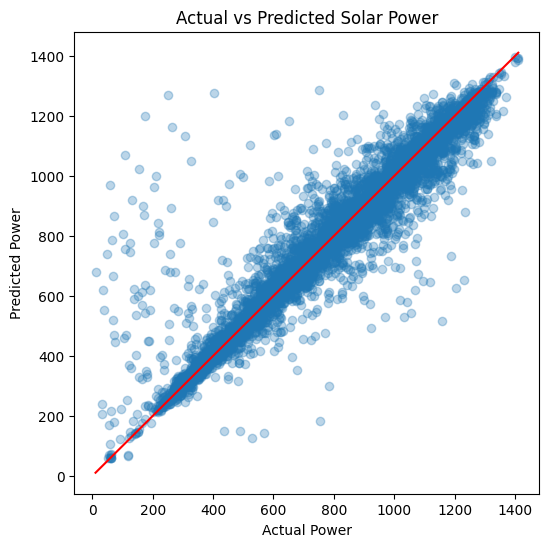

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.3)
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs Predicted Solar Power")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()

In [27]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)

IRRADIATION                     0.448718
IRRADIATION_SQ                  0.402209
PREV_POWER                      0.048144
PREV_IRRADIATION                0.013001
TEMP_IRRADIATION_INTERACTION    0.012324
PREV_TEMP                       0.010266
AMBIENT_TEMPERATURE             0.007662
TEMP_EFFICIENCY                 0.005489
PLANT                           0.003780
DAY_OF_YEAR                     0.003736
dtype: float64

# Saving The Model

In [28]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "features.pkl")

['features.pkl']